In [17]:
# rocHPCG on 1 node of JRDC
# https://github.com/ROCm/rocHPCG
# git commit ID: 3a5e87eff6b2ce4c9ba01d273f93d4aff34c4653
# slurm queue: mi-200
# compiler: gcc
# software modules:
#   stages/2022 GCC/11.2.0 OpenMPI/4.1.2 Architecture/jureca_mi200 ROCm/5.2.0 UCX-settings/RC-ROCm
# grid size: x=512,y=512,z=296
%matplotlib inline
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.ticker import MaxNLocator

fname = "hpcg-rocm_baseline.csv"
run_data = pd.read_csv(fname, sep=",", engine='python')

display(run_data.columns)
display(run_data)

Index(['jube_benchmark_id', 'system', 'modules', 'nodes', 'taskspernode', 'threadspertask', 'OMP_PROC_BIND', 'nx', 'ny', 'nz', 'tot_mem', 'GB_read', 'GB_write', 'GB_total', 'GB_t_o', 'GF_DDOT', 'GF_WAXPBY', 'GF_SpMV', 'GF_MG', 'MinAllreduce', 'MaxAllreduce', 'AvgAllreduce', 'GF_RawTotal', 'GF_Total', 'valid', 'runtime[sec]', 'job_id', 'status'], dtype='object')

,jube_benchmark_id,system,modules,nodes,taskspernode,threadspertask,OMP_PROC_BIND,nx,ny,nz,tot_mem,GB_read,GB_write,GB_total,GB_t_o,GF_DDOT,GF_WAXPBY,GF_SpMV,GF_MG,MinAllreduce,MaxAllreduce,AvgAllreduce,GF_RawTotal,GF_Total,valid,runtime[sec],job_id,status
0,136,JRDC,2022-go,1,8,4,True,560,280,280,251.090,11783.0,2722.47,14505.4,13035.9,1964.78,801.854,1504.83,2094.23,0.10960,0.39713,0.27897,1913.87,1719.98,1,685.57,10829179,COMPLETED
1,136,JRDC,2022-go,1,8,4,True,560,280,280,251.090,11777.4,2721.19,14498.6,12619.7,1982.57,800.913,1507.48,2093.76,0.07987,0.33660,0.25704,1912.97,1665.06,1,688.39,10829180,COMPLETED
2,136,JRDC,2022-go,1,8,4,True,560,280,280,251.090,11757.6,2716.60,14474.2,13040.1,1969.92,796.585,1510.15,2090.88,0.15052,0.41830,0.27143,1909.75,1720.53,1,709.50,10829181,COMPLETED
3,136,JRDC,2022-go,1,8,4,True,560,280,280,251.090,11773.7,2720.33,14494.0,13057.5,1970.48,802.490,1507.02,2092.59,0.10340,0.38529,0.26086,1912.37,1722.83,1,683.34,10829182,COMPLETED
4,136,JRDC,2022-go,1,8,4,True,560,280,280,251.090,11770.3,2719.54,14489.9,13054.5,1947.34,801.295,1509.95,2092.52,0.18287,0.38223,0.25862,1911.82,1722.43,1,709.69,10829183,COMPLETED
5,136,JRDC,2022-go,1,8,4,True,560,280,280,251.090,11777.0,2721.09,14498.1,13062.7,1979.49,800.929,1507.13,2092.25,0.09787,0.39838,0.26199,1912.90,1723.51,1,681.57,10829184,COMPLETED
6,136,JRDC,2022-go,1,8,4,True,560,280,280,251.090,11785.4,2723.04,14508.5,13071.2,1969.49,799.690,1510.09,2093.64,0.12887,0.31296,0.24076,1914.28,1724.64,1,709.04,10829185,COMPLETED
7,136,JRDC,2022-go,1,8,4,True,560,280,280,251.090,11777.2,2721.13,14498.3,13062.8,1984.79,801.407,1508.51,2093.11,0.09914,0.39016,0.25423,1912.93,1723.53,1,687.40,10829186,COMPLETED
8,136,JRDC,2022-go,1,8,4,True,560,280,280,251.090,11768.7,2719.18,14487.9,13052.7,1973.92,796.959,1508.86,2092.91,0.14681,0.35347,0.28345,1911.56,1722.19,1,710.26,10829187,COMPLETED
9,136,JRDC,2022-go,1,8,4,True,560,280,280,251.090,11774.0,2720.40,14494.4,13053.8,1963.80,800.761,1509.08,2092.70,0.10916,0.43525,0.30295,1912.42,1722.34,1,686.41,10829188,COMPLETED


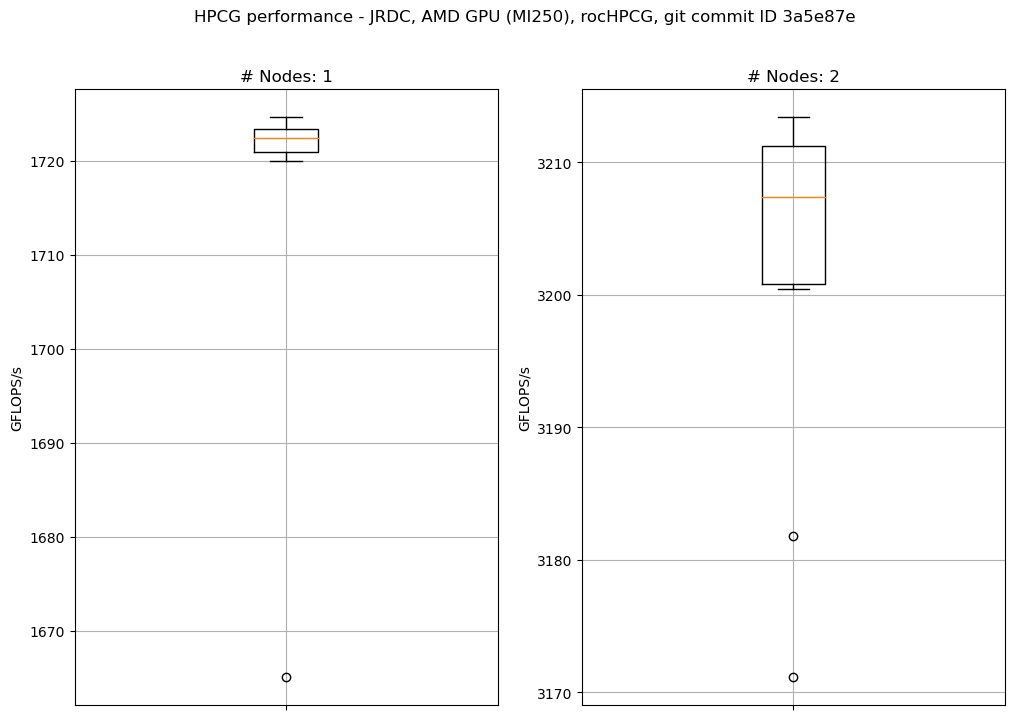

In [18]:
grouped = run_data.groupby('nodes')

columns_to_plot = ['GF_Total']

# Generate box plot for each group
plt.figure(figsize=(12, 8))
for i, (nodes, group) in enumerate(grouped):
    plt.subplot(1, len(grouped), i + 1)
    plt.boxplot([group[col] for col in columns_to_plot], labels=None)
    plt.title(f'# Nodes: {nodes}')
    plt.xlabel('')
    plt.xticks(range(1, len(columns_to_plot) + 1), [''] * len(columns_to_plot))  # Show ticks but no labels
    plt.ylabel('GFLOPS/s')
    plt.grid(True)

plt.suptitle("HPCG performance - JRDC, AMD GPU (MI250), rocHPCG, git commit ID 3a5e87e")
plt.show()

In [15]:
%matplotlib inline
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.ticker import MaxNLocator

# HPCG CPU on 1 to 256 nodes of JRDC
# https://github.com/hpcg-benchmark/hpcg/
# git commit ID: e64982640f0aa83f851fe3e1405c61d9a6d7321c
# slurm queue: dc-cpu
# compiler: icpx
# software modules:
#   stages/2022 Intel/2021.4.0 ParaStationMPI/5.5.0-1
# grid size: x=192,y=128,z=128
fname = "hpcg-cpu_baseline.csv"
run_data = pd.read_csv(fname, sep=",", engine='python')
run_data['jube_benchmark_id'] = run_data['jube_benchmark_id'].replace(to_replace=142, value=141)
run_data['jube_benchmark_id'] = run_data['jube_benchmark_id'].replace(to_replace=143, value=141)

display(run_data.columns)
display(run_data)

Index(['jube_benchmark_id', 'system', 'modules', 'nodes', 'taskspernode', 'threadspertask', 'OMP_PROC_BIND', 'nx', 'ny', 'nz', 'tot_mem', 'GB_read', 'GB_write', 'GB_total', 'GB_t_o', 'GF_DDOT', 'GF_WAXPBY', 'GF_SpMV', 'GF_MG', 'MinAllreduce', 'MaxAllreduce', 'AvgAllreduce', 'GF_RawTotal', 'GF_Total', 'valid', 'runtime[sec]', 'job_id', 'status'], dtype='object')

,jube_benchmark_id,system,modules,nodes,taskspernode,threadspertask,OMP_PROC_BIND,nx,ny,nz,tot_mem,GB_read,GB_write,GB_total,GB_t_o,GF_DDOT,GF_WAXPBY,GF_SpMV,GF_MG,MinAllreduce,MaxAllreduce,AvgAllreduce,GF_RawTotal,GF_Total,valid,runtime[sec],job_id,status
0,141,JRDC,2022-ips,1,16,8,True,192,128,128,35.9943,172.860,39.9467,212.807,208.230,5.16077,31.9702,40.5788,28.9329,2.62537,25.3808,19.47650,28.0610,27.4575,1.0,394.08,10994247,COMPLETED
1,141,JRDC,2022-ips,1,32,4,True,192,128,128,71.9883,234.061,54.0948,288.156,273.720,9.09009,28.6076,41.1114,40.2423,6.89912,17.2208,11.74640,37.9975,36.0939,1.0,444.11,10994246,COMPLETED
2,141,JRDC,2022-ips,1,64,2,True,192,128,128,143.9760,244.210,56.4344,300.644,298.014,10.22250,27.3471,41.6690,42.0439,3.99790,19.6935,11.40270,39.6465,39.2996,1.0,624.81,10994245,COMPLETED
3,141,JRDC,2022-ips,1,128,1,True,192,128,128,287.9520,243.279,56.2192,299.498,297.610,27.71070,26.8598,41.4126,39.8766,3.85267,19.7567,9.17871,39.4959,39.2468,1.0,860.47,10994244,COMPLETED
4,141,JRDC,2022-ips,2,16,8,True,192,128,128,71.9883,314.226,72.6149,386.841,379.078,7.84911,63.3931,81.3204,53.0262,5.10178,32.2148,20.78610,51.0114,49.9878,1.0,397.89,10994251,COMPLETED
5,141,JRDC,2022-ips,2,32,4,True,192,128,128,143.9760,458.817,106.0280,564.844,557.814,46.10020,56.9439,82.2400,74.6006,4.96829,17.9825,14.48830,74.4870,73.5598,1.0,439.13,10994250,COMPLETED
6,141,JRDC,2022-ips,2,64,2,True,192,128,128,287.9520,484.109,111.8720,595.981,590.894,14.96020,54.4934,83.1769,85.6806,10.11930,28.4992,14.88360,78.5940,77.9232,1.0,630.56,10994249,COMPLETED
7,141,JRDC,2022-ips,2,128,1,True,192,128,128,575.9040,481.982,111.3800,593.362,589.426,21.52020,53.5604,83.4569,82.3614,4.13007,30.2943,12.63800,78.2502,77.7310,1.0,871.14,10994248,COMPLETED
8,141,JRDC,2022-ips,4,16,8,True,192,128,128,143.9760,645.513,149.1710,794.684,777.948,32.81800,127.2270,162.4350,102.3780,12.81070,30.2688,21.63150,104.7960,102.5890,1.0,392.98,10994255,COMPLETED
9,141,JRDC,2022-ips,4,32,4,True,192,128,128,287.9520,910.781,210.4710,1121.250,1106.060,29.19080,114.3560,165.3640,158.4810,9.29290,23.6287,15.85470,147.8630,145.8600,1.0,443.09,10994254,COMPLETED


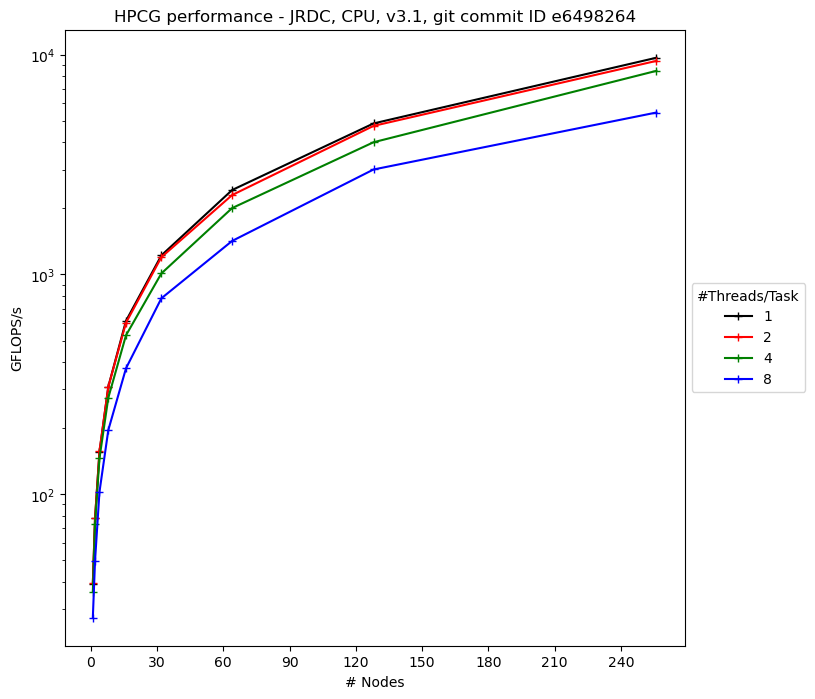

In [16]:
def select_color(threadspertask):
    if int(threadspertask) == 1:
        return "black"
    elif int(threadspertask) == 2:
        return "red"
    elif int(threadspertask) == 4:
        return "green"
    elif int(threadspertask) == 8:
        return "blue"
    
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 5)

fig, ax = plt.subplots(figsize=(8,8))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

grouped = run_data.groupby(['threadspertask','nx'])

for label, df in grouped:
    c = select_color(label[0])
    df.plot(x="nodes", y="GF_Total", ax=ax, label=label[0], marker="+", color=c, linestyle="solid")

ax.set_xlabel('# Nodes')
ax.set_ylabel('GFLOPS/s')
plt.yscale('log')
plt.title("HPCG performance - JRDC, CPU, v3.1, git commit ID e6498264")
plt.legend(title='#Threads/Task', loc='center left', bbox_to_anchor=(1.0, 0.5))

In [13]:
%matplotlib inline
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.ticker import MaxNLocator

# HPCG CUDA on 1 to 512 nodes of JWB
# slurm queue: booster
# compiler: proprietary binary by Nvidia (hpc-benchmarks 21.4)
# software modules:
#   stages/2022 GCC/11.2.0 OpenMPI/4.1.2
# grid size: x=512,y=280,z=280 
fname = "hpcg-cuda_baseline.csv"
run_data = pd.read_csv(fname, sep=",", engine='python')
run_data['jube_benchmark_id'] = run_data['jube_benchmark_id'].replace(to_replace=102, value=101)
run_data['jube_benchmark_id'] = run_data['jube_benchmark_id'].replace(to_replace=103, value=101)

display(run_data.columns)
display(run_data)

Index(['jube_benchmark_id', 'system', 'modules', 'nodes', 'taskspernode', 'threadspertask', 'OMP_PROC_BIND', 'nx', 'ny', 'nz', 'tot_mem', 'GB_read', 'GB_write', 'GB_total', 'GB_t_o', 'GF_DDOT', 'GF_WAXPBY', 'GF_SpMV', 'GF_MG', 'MinAllreduce', 'MaxAllreduce', 'AvgAllreduce', 'GF_RawTotal', 'GF_Total', 'valid', 'runtime[sec]', 'job_id'], dtype='object')

,jube_benchmark_id,system,modules,nodes,taskspernode,threadspertask,OMP_PROC_BIND,nx,ny,nz,tot_mem,GB_read,GB_write,GB_total,GB_t_o,GF_DDOT,GF_WAXPBY,GF_SpMV,GF_MG,MinAllreduce,MaxAllreduce,AvgAllreduce,GF_RawTotal,GF_Total,valid,runtime[sec],job_id
0,101,JWB,2022-go,1,4,6,True,512,280,280,114.773,6502.6,1502.69,8005.29,7847.75,969.191,441.159,773.126,1165.96,0.16637,0.31350,0.22307,1055.65,1034.87,1,814.17,6037307
1,101,JWB,2022-go,2,4,6,True,512,280,280,229.569,12976.1,2999.20,15975.30,14510.30,1884.970,882.612,1547.200,2325.75,0.23840,0.43278,0.33341,2106.65,1913.46,1,820.50,6037308
2,101,JWB,2022-go,4,4,6,True,512,280,280,459.137,25823.5,5968.65,31792.20,28896.60,3196.870,1769.000,3095.420,4639.64,0.28464,1.59279,0.75043,4192.45,3810.61,1,816.75,6037309
3,101,JWB,2022-go,8,4,6,True,512,280,280,918.273,51443.4,11889.70,63333.00,58694.50,5415.630,3540.310,6197.810,9274.62,0.41641,4.42364,2.26592,8351.97,7740.27,1,822.81,6037310
4,101,JWB,2022-go,16,4,6,True,512,280,280,1836.550,102556.0,23703.80,126260.00,114757.00,10079.800,7091.690,12398.100,18511.70,0.47308,4.53980,2.47892,16650.50,15133.60,1,819.43,6037311
5,101,JWB,2022-go,32,4,6,True,512,280,280,3673.090,204871.0,47351.80,252222.00,229267.00,19432.700,14268.500,24795.300,37003.10,0.82440,6.01449,3.95303,33262.00,30234.70,1,825.47,6037312
6,101,JWB,2022-go,64,4,6,True,512,280,280,7346.180,409460.0,94634.40,504095.00,467157.00,37164.700,28546.200,49609.400,74056.70,1.02173,6.65540,4.39059,66478.90,61607.70,1,831.35,6037315
7,100,JWB,2022-go,128,4,6,True,512,280,280,14692.400,818790.0,189247.00,1008040.00,915563.00,73511.500,57279.500,99258.000,148100.00,0.94285,3.95042,1.73395,132938.00,120743.00,1,845.48,6037162
8,100,JWB,2022-go,256,4,6,True,512,280,280,29384.700,1636230.0,378181.00,2014410.00,1834000.00,141891.000,114981.000,198538.000,296228.00,1.44401,5.54849,3.24549,265657.00,241865.00,1,837.39,6037163
9,101,JWB,2022-go,512,4,6,True,512,280,280,58769.400,3270110.0,755785.00,4025900.00,3729120.00,274179.000,230977.000,397068.000,592613.00,1.30669,4.53604,2.05633,530935.00,491796.00,1,838.16,6037723


Text(0.5, 1.0, 'HPCG performance - JWB, CUDA, Nvidia HPC-Benchmark 21.4')

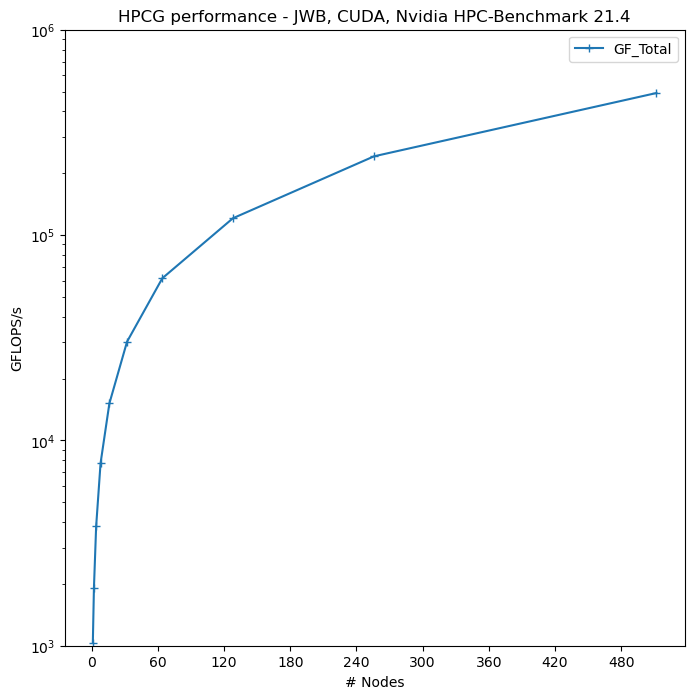

In [14]:
def select_color(threadspertask):
    if int(threadspertask) == 1:
        return "black"
    elif int(threadspertask) == 2:
        return "red"
    elif int(threadspertask) == 4:
        return "green"
    elif int(threadspertask) == 8:
        return "blue"
    
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 5)

fig, ax = plt.subplots(figsize=(8,8))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

run_data.plot(x="nodes", y="GF_Total", ax=ax, marker="+", linestyle="solid")

ax.set_xlabel('# Nodes')
ax.set_ylabel('GFLOPS/s')
plt.yscale('log')
ax.set_ylim(10**3, 10**6)
plt.title("HPCG performance - JWB, CUDA, Nvidia HPC-Benchmark 21.4")